In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
# prompt: penguins DataFrame 사용: Nan을 모두 drop

penguins.dropna()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
penguins.dropna(inplace=True)

In [22]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


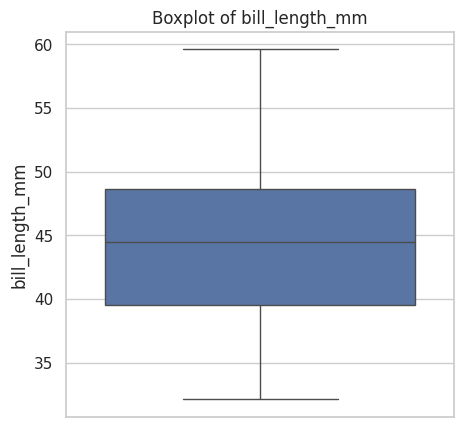

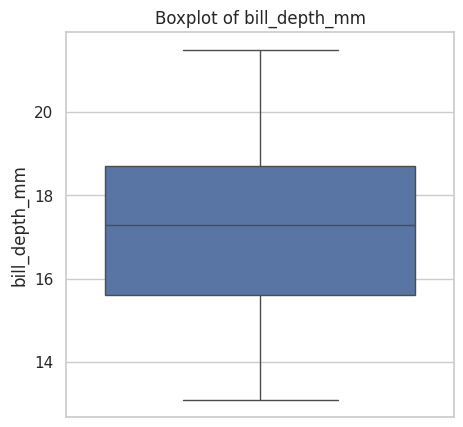

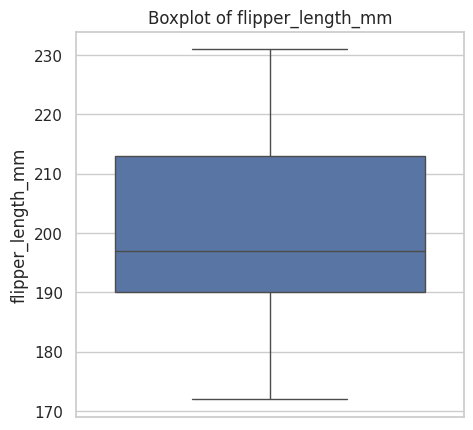

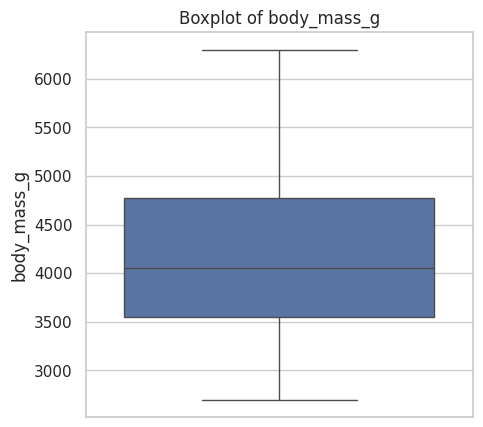

In [23]:
# prompt: 모든 수치형 변수에서 이상치를 탐색해 달라

import seaborn as sns
import matplotlib.pyplot as plt

# Find the numerical columns
numerical_cols = penguins.select_dtypes(include=["int", "float"]).columns

# Loop through the numerical columns and create boxplots
for col in numerical_cols:
  plt.figure(figsize=(5, 5))
  sns.boxplot(y=penguins[col])
  plt.title(f"Boxplot of {col}")
  plt.show()


In [31]:
# prompt: sex를 target으로 하고 random forest를 수행하여 예측

from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = penguins.drop('sex', axis=1)
y = penguins['sex']

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy}")


ValueError: could not convert string to float: 'Adelie'

In [25]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [28]:
# prompt: 모든 object datatype을 category로 만들어 다오

import pandas as pd

# Get all object columns
object_cols = penguins.select_dtypes(include='object').columns

# Convert all object columns to category
penguins[object_cols] = penguins[object_cols].apply(pd.Categorical)

# Print the updated DataFrame
print(penguins.info())


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB
None


In [29]:
# prompt: 모든 category 변수를 onehot code로 만들어 원래 데이터프레임에 반영해다오 단 'sex'컬럼은 제외

import pandas as pd

# Get all object columns except 'sex'
object_cols = penguins.select_dtypes(include='category').columns
object_cols = object_cols.drop('sex')

# One-hot encode the categorical columns
penguins_onehot = pd.get_dummies(penguins, columns=object_cols)

# Print the updated DataFrame
print(penguins_onehot.info())


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   bill_length_mm     333 non-null    float64 
 1   bill_depth_mm      333 non-null    float64 
 2   flipper_length_mm  333 non-null    float64 
 3   body_mass_g        333 non-null    float64 
 4   sex                333 non-null    category
 5   species_Adelie     333 non-null    bool    
 6   species_Chinstrap  333 non-null    bool    
 7   species_Gentoo     333 non-null    bool    
 8   island_Biscoe      333 non-null    bool    
 9   island_Dream       333 non-null    bool    
 10  island_Torgersen   333 non-null    bool    
dtypes: bool(6), category(1), float64(4)
memory usage: 15.4 KB
None


In [34]:
penguins = penguins_onehot.copy()

In [35]:
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,Male,True,False,False,False,False,True
1,39.5,17.4,186.0,3800.0,Female,True,False,False,False,False,True
2,40.3,18.0,195.0,3250.0,Female,True,False,False,False,False,True
4,36.7,19.3,193.0,3450.0,Female,True,False,False,False,False,True
5,39.3,20.6,190.0,3650.0,Male,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Female,False,False,True,True,False,False
340,46.8,14.3,215.0,4850.0,Female,False,False,True,True,False,False
341,50.4,15.7,222.0,5750.0,Male,False,False,True,True,False,False
342,45.2,14.8,212.0,5200.0,Female,False,False,True,True,False,False


In [36]:
# prompt: sex를 target으로 하고 random forest를 수행하여 예측

from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = penguins.drop('sex', axis=1)
y = penguins['sex']

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


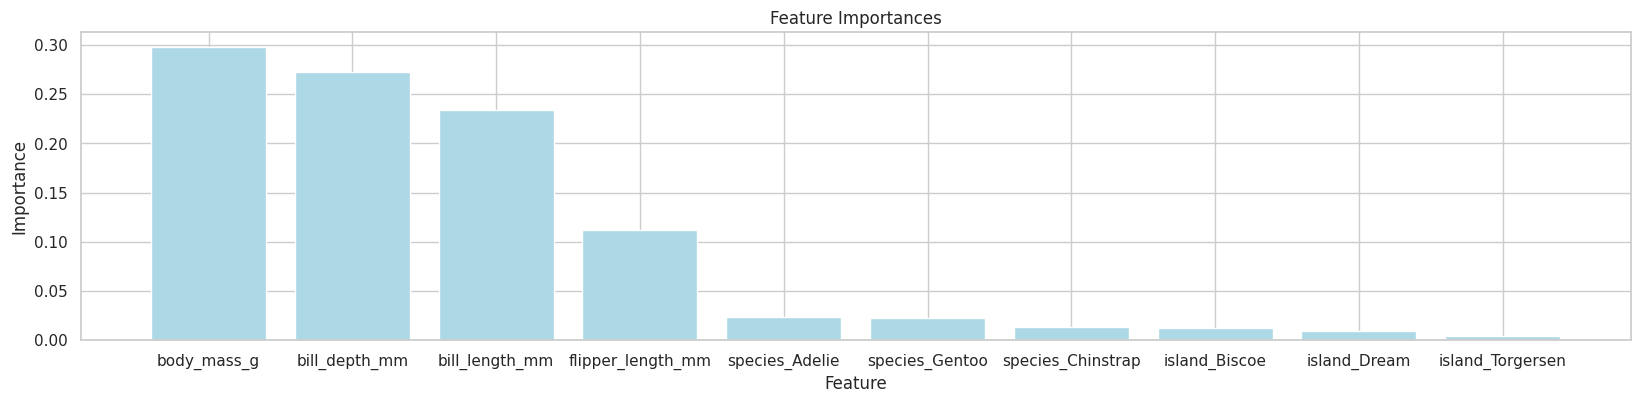

In [39]:
# prompt: feature importance를 시각화

import matplotlib.pyplot as plt
import numpy as np
importances = model.feature_importances_
features = X.columns

# Sort importances and features in descending order
sorted_indices = np.argsort(-importances)
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(20, 4))
plt.bar(sorted_features, sorted_importances, color='lightblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [42]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
# prompt: Hyperparameter tuning with coross validation

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
  'n_estimators': [50, 100, 150, 200],
  'max_depth': [5, 10, 15, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy}")

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Accuracy: 0.972972972972973
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [44]:
# prompt: Hyperparameter tuning with coross validation, hold out 을 randomgridsearch로

from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
  'n_estimators': [50, 100, 150, 200],
  'max_depth': [5, 10, 15, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10)

# Fit the model to the training data
random_search.fit(X, y)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy}")

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Accuracy: 0.978978978978979
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}


In [45]:
# prompt: Hyperparameter tuning with coross validation, hold out 을 randomgridsearch로 train, test data split

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the hyperparameter grid
param_grid = {
  'n_estimators': [50, 100, 150, 200],
  'max_depth': [5, 10, 15, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Accuracy: 0.9104477611940298
Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}


In [47]:
pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.397804,0.103332,0.016930,0.003457,150,2,1,5,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.962963,0.886792,0.924528,0.886792,0.905660,0.913347,0.028482,1
5,0.140214,0.004055,0.008136,0.002294,100,10,2,15,"{'n_estimators': 100, 'min_samples_split': 10,...",0.962963,0.886792,0.924528,0.886792,0.867925,0.905800,0.033987,2
3,0.075539,0.001446,0.005212,0.000043,50,2,4,10,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.944444,0.867925,0.924528,0.905660,0.867925,0.902096,0.030478,3
2,0.270848,0.065277,0.012292,0.003325,150,2,1,20,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.944444,0.905660,0.905660,0.886792,0.867925,0.902096,0.025380,4
7,0.072026,0.004235,0.005131,0.000713,50,2,2,15,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.944444,0.886792,0.924528,0.867925,0.886792,0.902096,0.028045,4
4,0.215899,0.005320,0.010035,0.000704,150,2,2,5,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.962963,0.886792,0.924528,0.886792,0.849057,0.902027,0.038703,6
8,0.298704,0.051633,0.013726,0.002319,150,10,1,5,"{'n_estimators': 150, 'min_samples_split': 10,...",0.962963,0.867925,0.943396,0.867925,0.849057,0.898253,0.045793,7
6,0.206443,0.006774,0.009460,0.000528,150,5,4,20,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.962963,0.867925,0.905660,0.886792,0.867925,0.898253,0.035251,8
1,0.276344,0.014640,0.017769,0.005713,100,2,2,20,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.944444,0.849057,0.924528,0.886792,0.830189,0.887002,0.043302,9
9,0.221721,0.020700,0.010308,0.001695,100,10,1,20,"{'n_estimators': 100, 'min_samples_split': 10,...",0.944444,0.867925,0.905660,0.849057,0.849057,0.883229,0.036933,10
